In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from scipy.stats import pearsonr
from scipy.stats import ttest_ind

from sklearn.decomposition import PCA

In [2]:
dfc = pd.read_csv('df_combinado.csv')
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    984 non-null    int64  
 1   Año                           984 non-null    int64  
 2   Trimestre                     984 non-null    int64  
 3   Provincia                     984 non-null    object 
 4   ADSL                          984 non-null    int64  
 5   Cablemodem                    984 non-null    int64  
 6   Fibra óptica                  984 non-null    int64  
 7   Wireless                      984 non-null    int64  
 8   Otros                         984 non-null    int64  
 9   Total conexion                984 non-null    int64  
 10  Accesos por cada 100 hab      984 non-null    int64  
 11  Accesos por cada 100 hogares  984 non-null    int64  
 12  Banda ancha fija              984 non-null    int64  
 13  Dial 

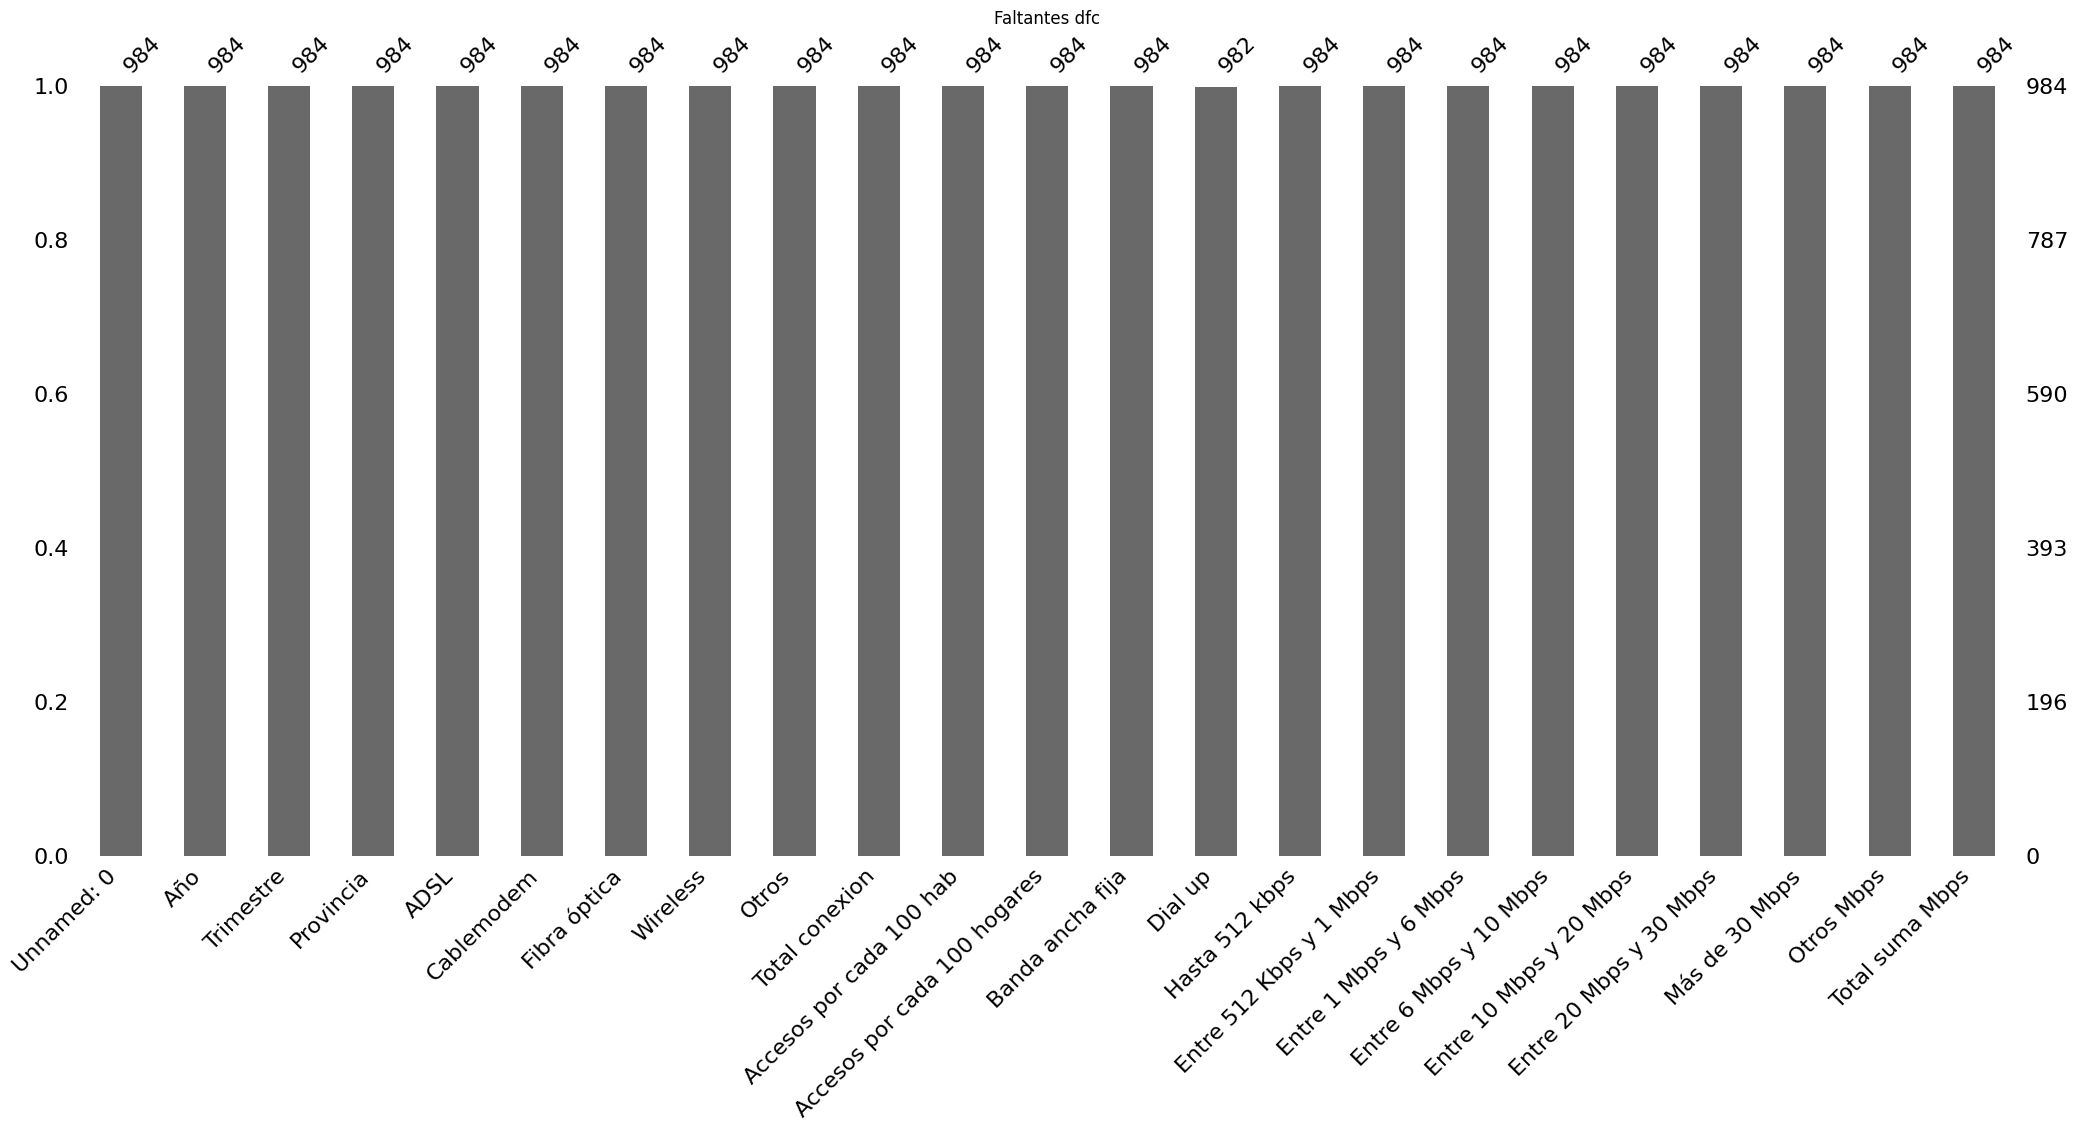

In [3]:
msno.bar(dfc)
plt.title('Faltantes dfc')
plt.show()

In [4]:
# Tipos de conexion
col = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
dfest = dfc[col].describe()
print(dfest)

               ADSL    Cablemodem  Fibra óptica       Wireless          Otros
count  9.840000e+02  9.840000e+02  9.840000e+02     984.000000     984.000000
mean   1.150317e+05  1.832892e+05  4.728246e+04   12385.282520    6556.766260
std    2.385989e+05  4.500403e+05  1.762796e+05   20996.226278   11567.922012
min    2.827000e+03  0.000000e+00  0.000000e+00       0.000000       2.000000
25%    2.076400e+04  1.085600e+04  3.540000e+02     734.000000     332.000000
50%    4.452300e+04  4.014950e+04  2.581000e+03    5105.500000    1901.000000
75%    9.148125e+04  7.582350e+04  2.554050e+04   14034.750000    7546.500000
max    1.586343e+06  2.797700e+06  1.799013e+06  150290.000000  101294.000000


Observamos practicamente una igual cantidad de datos para los tipos de conexiones. En promedio es mayor para Cablemodem, luego de fibra óptica y finalmente ADSL, Wireless y otros tipos de conexión.

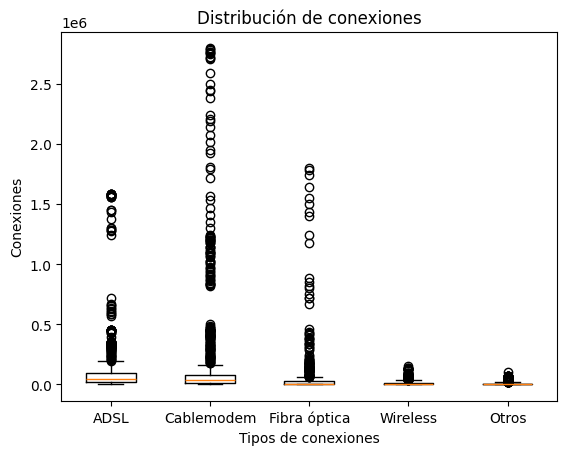

In [5]:
col = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
plt.boxplot(dfc[col])
plt.ylabel('Conexiones')
plt.xlabel('Tipos de conexiones')
plt.title('Distribución de conexiones')
plt.xticks(range(1, len(col) + 1), col)
plt.show()


Existe una mayor dispersion de los datos en conexiones con Cablemodem, seguida de Fibra Optica, ADSL, Wireless y  otros.

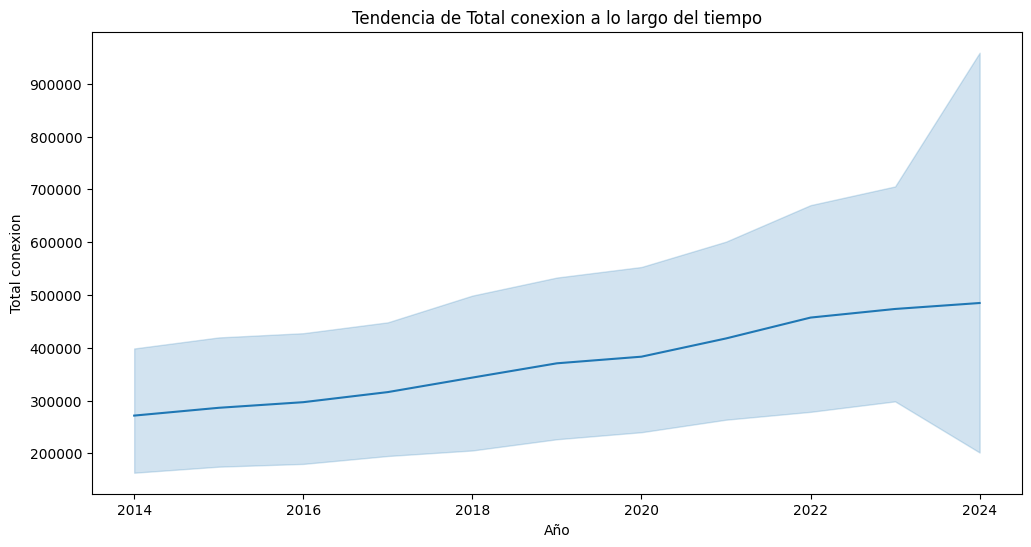

In [6]:
#Visualizamos variables Año, Trimestre, Provincia
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfc, x='Año', y='Total conexion')
plt.title('Tendencia de Total conexion a lo largo del tiempo')
plt.show()

Existe un incremento de las conexiones a lo largo de los años con una mayor tendencia a partir del año 2020.

In [7]:
años = dfc['Año'].value_counts()
trimestre = dfc['Trimestre'].value_counts()
provincia = dfc['Provincia'].value_counts()

print("Recuento de valores en la columna 'Año':")
print(años)
print("\nRecuento de valores en la columna 'Trimestre':")
print(trimestre)
print("\nRecuento de valores en la columna 'Provincia':")
print(provincia)

Recuento de valores en la columna 'Año':
Año
2023    96
2022    96
2021    96
2020    96
2019    96
2018    96
2017    96
2016    96
2015    96
2014    96
2024    24
Name: count, dtype: int64

Recuento de valores en la columna 'Trimestre':
Trimestre
1    264
4    240
3    240
2    240
Name: count, dtype: int64

Recuento de valores en la columna 'Provincia':
Provincia
Buenos Aires           41
Capital Federal        41
Tierra Del Fuego       41
Santiago Del Estero    41
Santa Fe               41
Santa Cruz             41
San Luis               41
San Juan               41
Salta                  41
Río Negro              41
Neuquén                41
Misiones               41
Mendoza                41
La Rioja               41
La Pampa               41
Jujuy                  41
Formosa                41
Entre Ríos             41
Corrientes             41
Córdoba                41
Chubut                 41
Chaco                  41
Catamarca              41
Tucumán                41
Name: 

In [8]:
print(dfc['Accesos por cada 100 hab'].describe())
print(dfc['Accesos por cada 100 hogares'].describe())

count    984.000000
mean      15.030488
std        9.212374
min        2.000000
25%        8.000000
50%       13.000000
75%       19.250000
max       52.000000
Name: Accesos por cada 100 hab, dtype: float64
count    984.000000
mean      51.657520
std       24.046403
min        9.000000
25%       33.000000
50%       49.000000
75%       65.000000
max      124.000000
Name: Accesos por cada 100 hogares, dtype: float64


EL acceso por cada 100 habitantes, encontramos que posee una media de 15.03, mientras que por cada hogar es mayor siendo un 52.16, con un valor maximo de 124.061394.

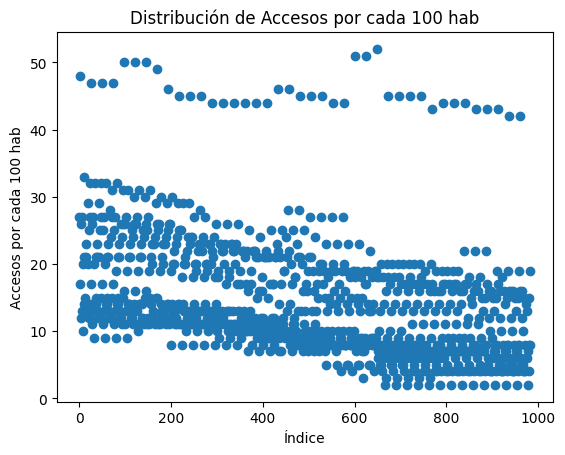

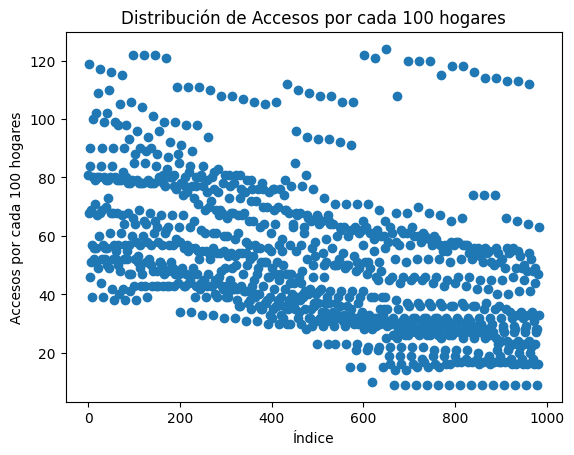

In [9]:
# Distribución de los datos: 
plt.plot(dfc['Accesos por cada 100 hab'], 'o')
plt.xlabel('Índice')
plt.ylabel('Accesos por cada 100 hab')
plt.title('Distribución de Accesos por cada 100 hab')
plt.show()

plt.plot(dfc['Accesos por cada 100 hogares'], 'o')
plt.xlabel('Índice')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Distribución de Accesos por cada 100 hogares')
plt.show()

In [10]:
# Variables Banda ancha fija y Dial Up
print(dfc['Banda ancha fija'].describe())
print(dfc['Dial up'].describe())

count    9.840000e+02
mean     3.636401e+05
std      7.829924e+05
min      1.219300e+04
25%      6.163725e+04
50%      1.116815e+05
75%      1.921412e+05
max      5.038657e+06
Name: Banda ancha fija, dtype: float64
count      982.000000
mean       907.123218
std       2291.815906
min          0.000000
25%          5.000000
50%        137.000000
75%        615.000000
max      15229.000000
Name: Dial up, dtype: float64


Observamos que la variable Banda Ancha Fija, tiene una media y valores maximos por encima de Dial Up.

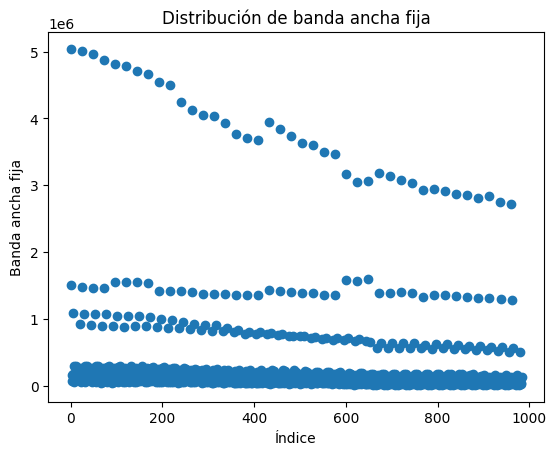

In [11]:
# Visualizacion de la distribución de Banda Ancha Fija: 
plt.plot(dfc['Banda ancha fija'], 'o')
plt.xlabel('Índice')
plt.ylabel('Banda ancha fija')
plt.title('Distribución de banda ancha fija')
plt.show()

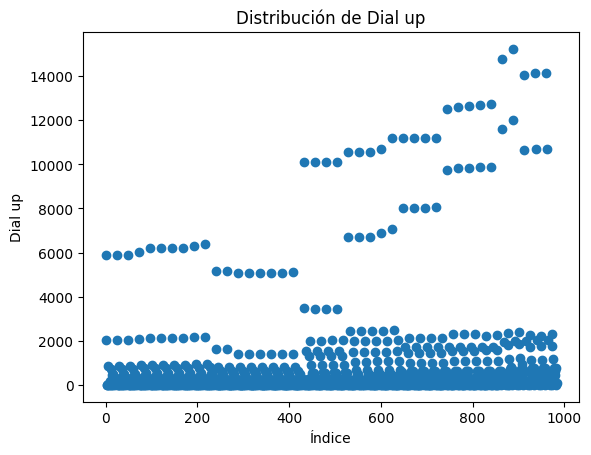

In [12]:
# Distribucion de Dial UP.
plt.plot(dfc['Dial up'], 'o')
plt.xlabel('Índice')
plt.ylabel('Dial up')
plt.title('Distribución de Dial up')
plt.show()

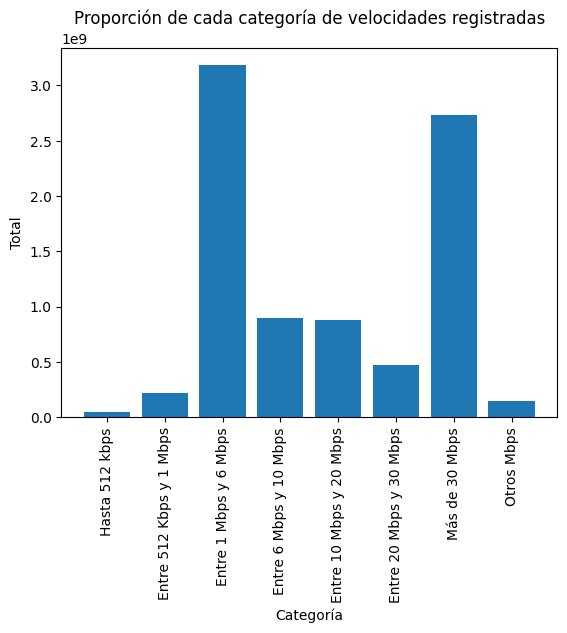

In [13]:
# De forma gráfica podemos ver la cantidad de cada velocidad registradas en el dataset
sizes = dfc[['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
                      'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps','Más de 30 Mbps', 'Otros Mbps']].sum()

labels = sizes.index
values = sizes.values

plt.bar(labels, values)
plt.xlabel('Categoría')
plt.ylabel('Total')
plt.title('Proporción de cada categoría de velocidades registradas')
plt.xticks(rotation=90)
plt.show()

In [14]:
# De forma más profunda los análisis estadísticos de estas variables son:
estadistica_vel = dfc[['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
                      'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps','Más de 30 Mbps','Total suma Mbps']].describe()

estadisticas_totales= pd.concat([estadistica_vel])
print(estadisticas_totales)

       Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  Entre 1 Mbps y 6 Mbps  \
count      984.000000               984.000000           9.840000e+02   
mean     47210.390244            219239.463415           3.233344e+06   
std      48859.332172            190790.675323           1.508337e+06   
min       5675.000000             28521.000000           8.661520e+05   
25%      29708.000000             71742.000000           2.531271e+06   
50%      35030.000000            195706.000000           3.316868e+06   
75%      41064.000000            294413.000000           4.816081e+06   
max     241713.000000            687619.000000           5.153437e+06   

       Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
count            9.840000e+02             9.840000e+02   
mean             9.155820e+05             8.898369e+05   
std              2.294915e+05             4.504563e+05   
min              2.891820e+05             1.011270e+05   
25%              8.594130e+05             6.932770e+

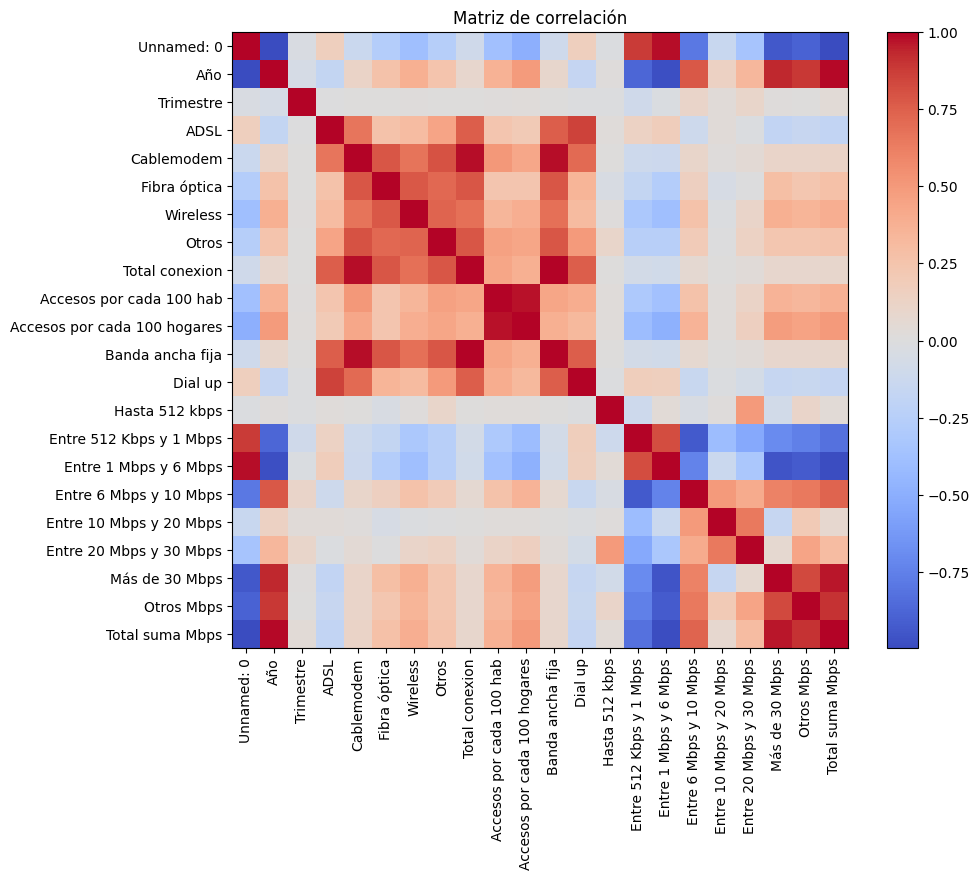

In [15]:
# Analisis bivariado - multivariado
corr_matrix = dfc.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Matriz de correlación')
plt.show()

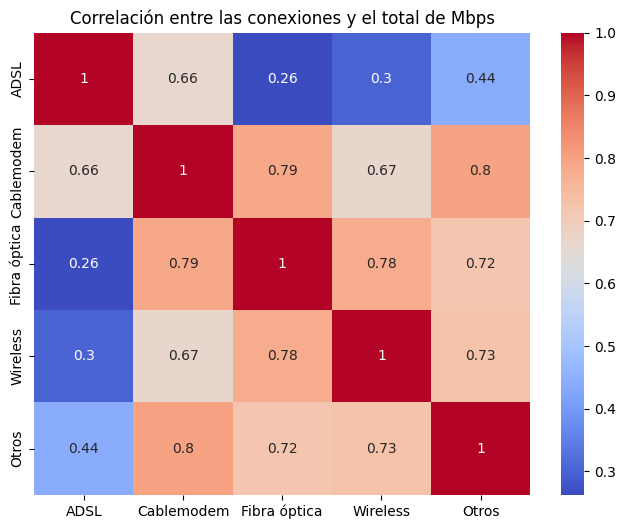

In [16]:
# Gráfico de correlación de las conexiones con el total de Mbps
conn_types = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
df_corr = dfc[conn_types]
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre las conexiones y el total de Mbps')
plt.show()

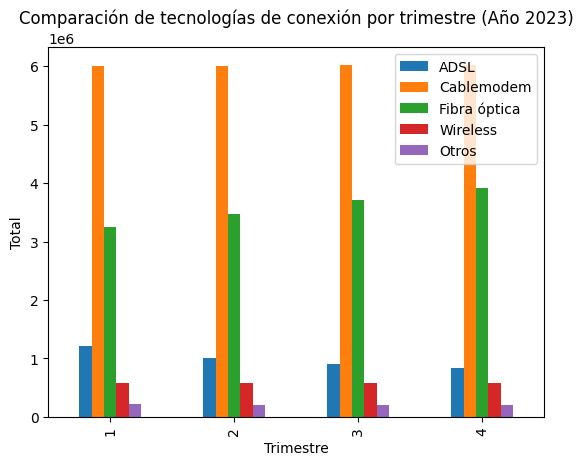

In [17]:
df_2023 = dfc[dfc['Año'] == 2023]

df_group = df_2023.groupby('Trimestre')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()
df_group.plot(kind='bar')
plt.xlabel('Trimestre')
plt.ylabel('Total')
plt.title('Comparación de tecnologías de conexión por trimestre (Año 2023)')
plt.show()

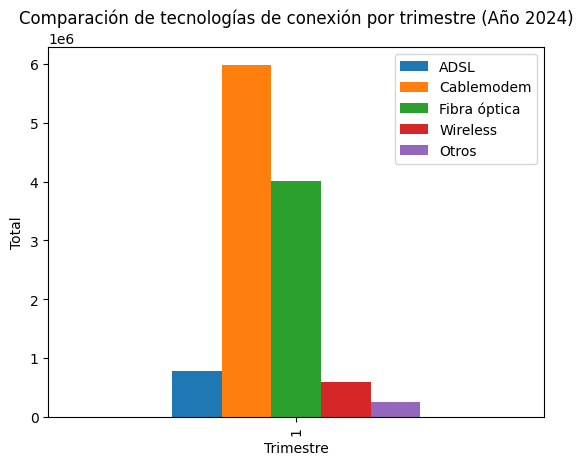

In [18]:
df_2024 = dfc[dfc['Año'] == 2024]

df_group = df_2024.groupby('Trimestre')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()
df_group.plot(kind='bar')
plt.xlabel('Trimestre')
plt.ylabel('Total')
plt.title('Comparación de tecnologías de conexión por trimestre (Año 2024)')
plt.show()

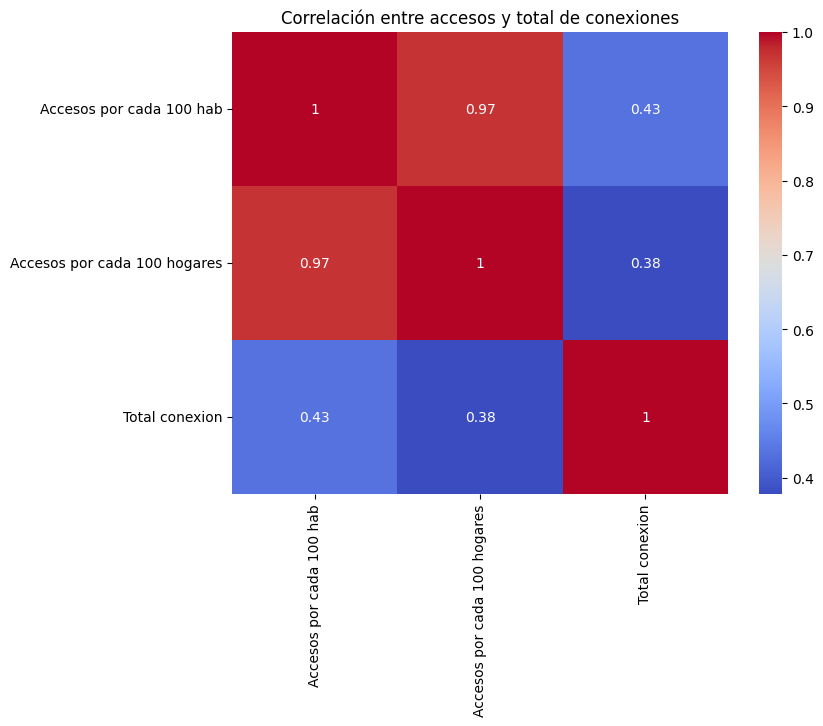

In [19]:
# Gráfico de correlación de los accesos
conn_types = ['Accesos por cada 100 hab', 'Accesos por cada 100 hogares', 'Total conexion']
df_corr = dfc[conn_types]
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre accesos y total de conexiones')
plt.show()

---------------------


In [20]:
dfn = pd.read_csv('df_nac.csv')
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22464 entries, 0 to 22463
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 22464 non-null  int64  
 1   Año                        22464 non-null  int64  
 2   Trimestre                  22464 non-null  int64  
 3   Banda ancha fija           22464 non-null  int64  
 4   Dial up                    22464 non-null  int64  
 5   Mbps (Media de bajada)     22464 non-null  float64
 6   Trimestre.1                22464 non-null  object 
 7   Provincia_x                22464 non-null  object 
 8   Hasta 512 kbps             22464 non-null  float64
 9   Entre 512 Kbps y 1 Mbps    22464 non-null  float64
 10  Entre 1 Mbps y 6 Mbps      22464 non-null  float64
 11  Entre 6 Mbps y 10 Mbps     22464 non-null  float64
 12  Entre 10 Mbps y 20 Mbps    22464 non-null  float64
 13  Entre 20 Mbps y 30 Mbps    22464 non-null  flo

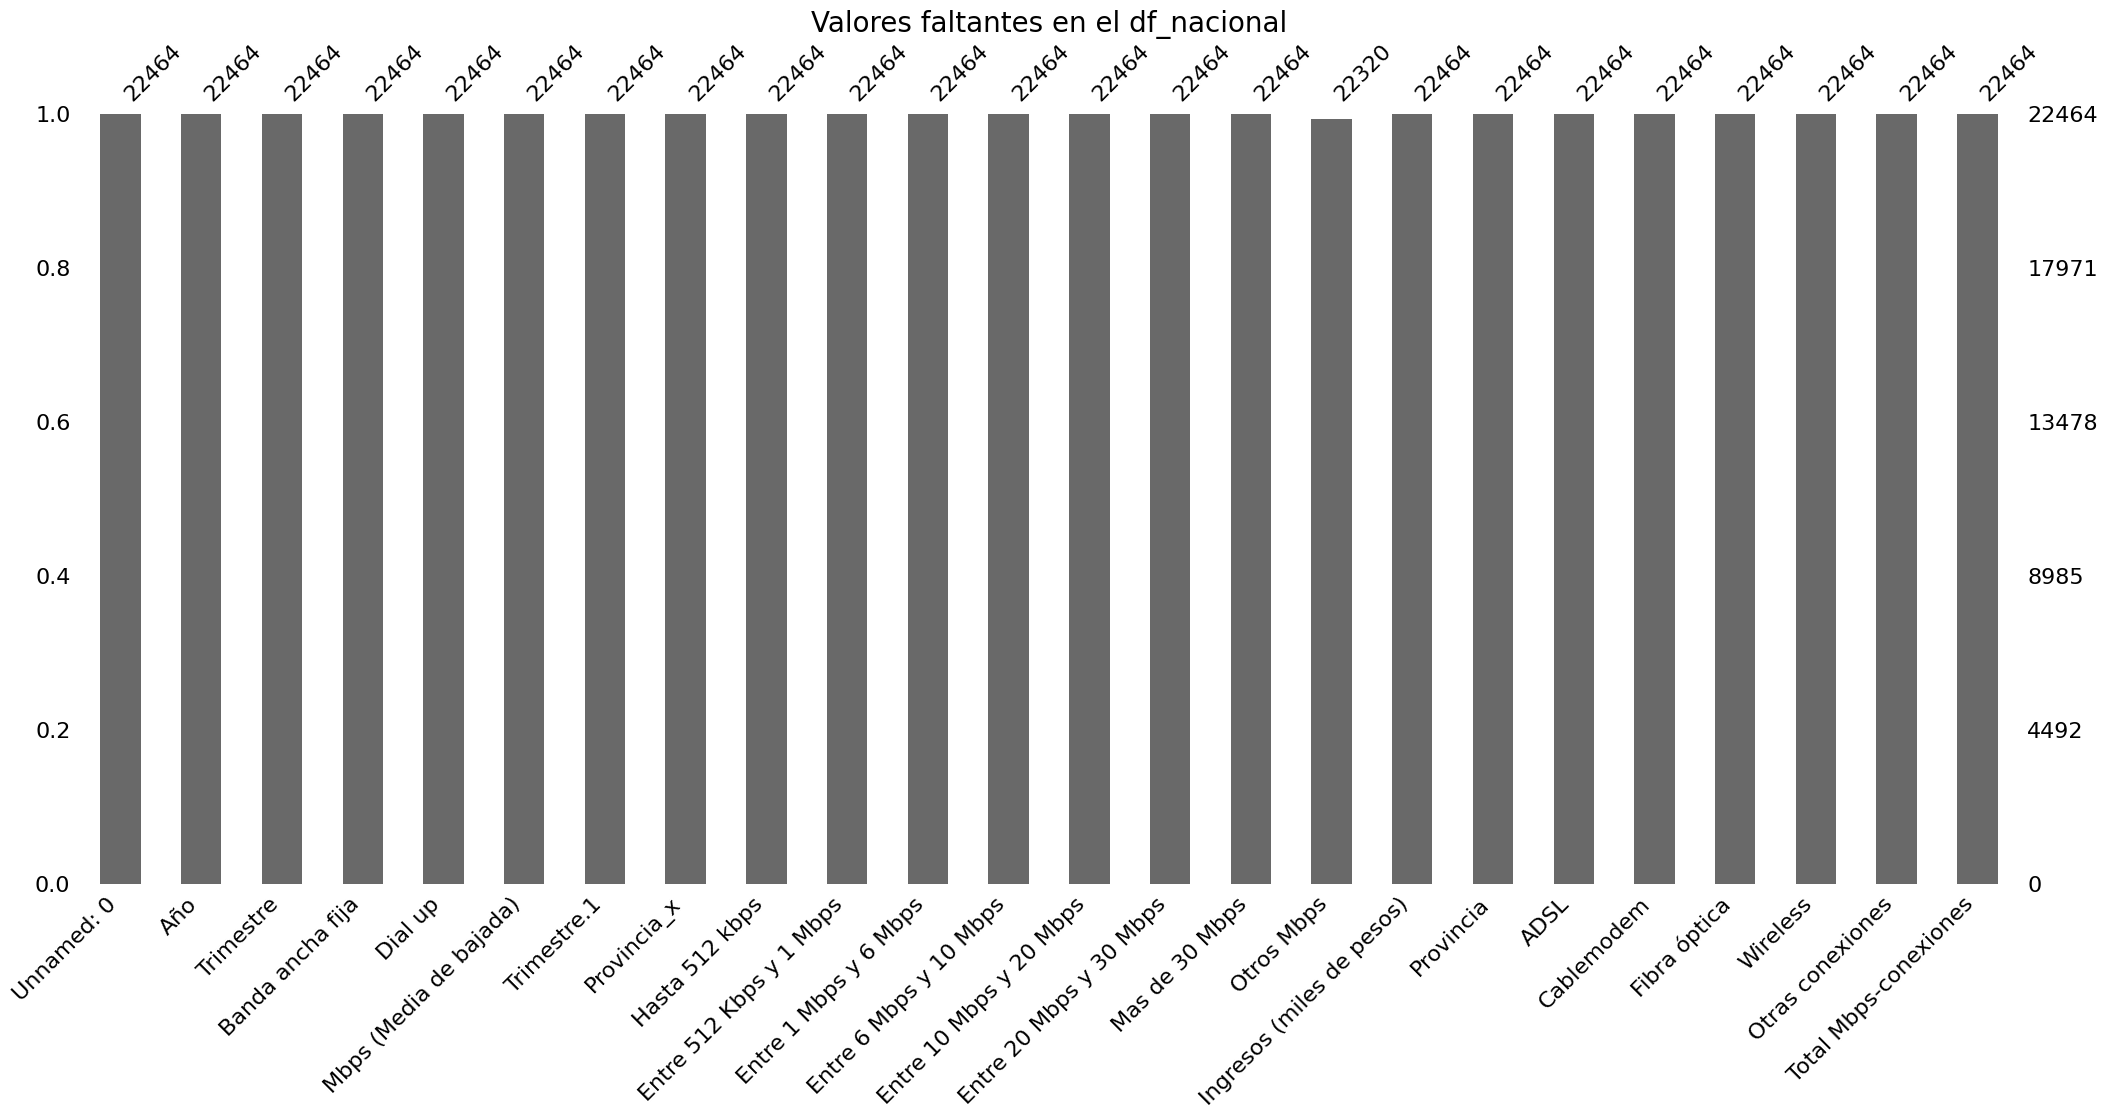

In [21]:
# Revisamos los valores faltantes del df
msno.bar(dfn)
plt.title('Valores faltantes en el df_nacional', fontsize=20) 
plt.show() # nuevamente vemos que no hay valores faltantes

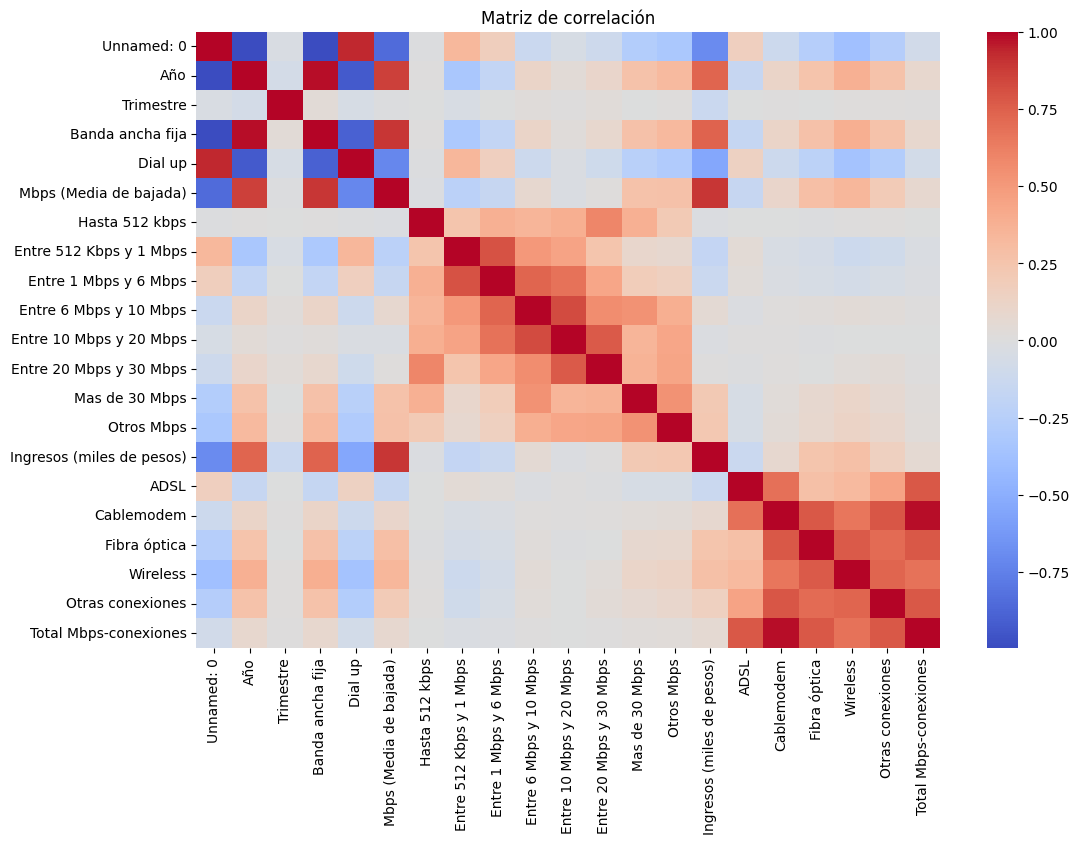

In [22]:
# Correlacion para las variables numericas
df_numeric = dfn.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()

# Matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [23]:
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras conexiones']
df_estadisticos = dfn[columnas].describe()
print(df_estadisticos)

               ADSL    Cablemodem  Fibra óptica       Wireless  \
count  2.246400e+04  2.246400e+04  2.246400e+04   22464.000000   
mean   1.187504e+05  1.798413e+05  4.206661e+04   11778.537393   
std    2.435841e+05  4.416678e+05  1.624545e+05   20249.856163   
min    2.827000e+03  0.000000e+00  0.000000e+00       0.000000   
25%    2.129625e+04  1.021200e+04  2.700000e+02     595.000000   
50%    4.576200e+04  3.880100e+04  1.995000e+03    4819.000000   
75%    9.191975e+04  7.437100e+04  2.203975e+04   13431.750000   
max    1.586343e+06  2.790663e+06  1.799013e+06  150290.000000   

       Otras conexiones  
count      22464.000000  
mean        6455.367521  
std        11373.942183  
min            2.000000  
25%          318.250000  
50%         1875.000000  
75%         7212.750000  
max       101294.000000  


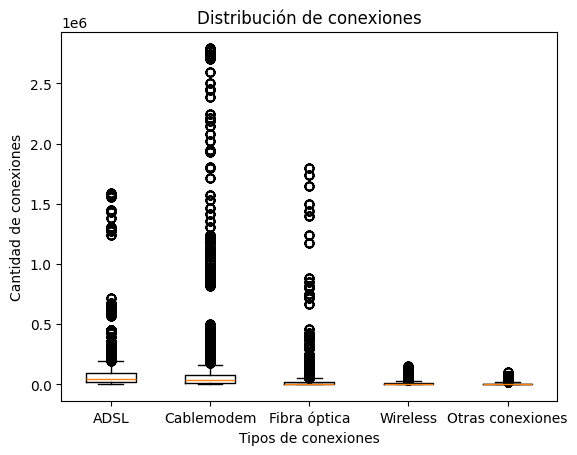

In [24]:
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras conexiones']
plt.boxplot(dfn[columnas])
plt.ylabel('Cantidad de conexiones')
plt.xlabel('Tipos de conexiones')
plt.title('Distribución de conexiones')
plt.xticks(range(1, len(columnas) + 1), columnas)
plt.show()

Text(0.5, 1.0, 'Correlación entre las conexiones y el total de Mbps')

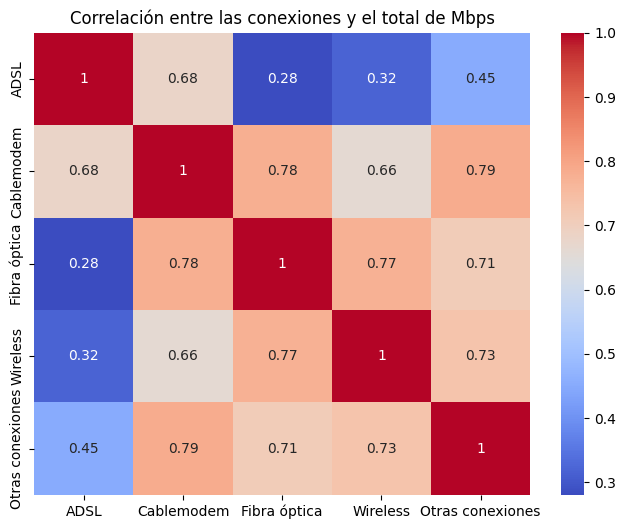

In [25]:
 #correlación de las conexiones con el total de Mbps
conn_types =  ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras conexiones']
df_corr = dfn[conn_types]
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre las conexiones y el total de Mbps')

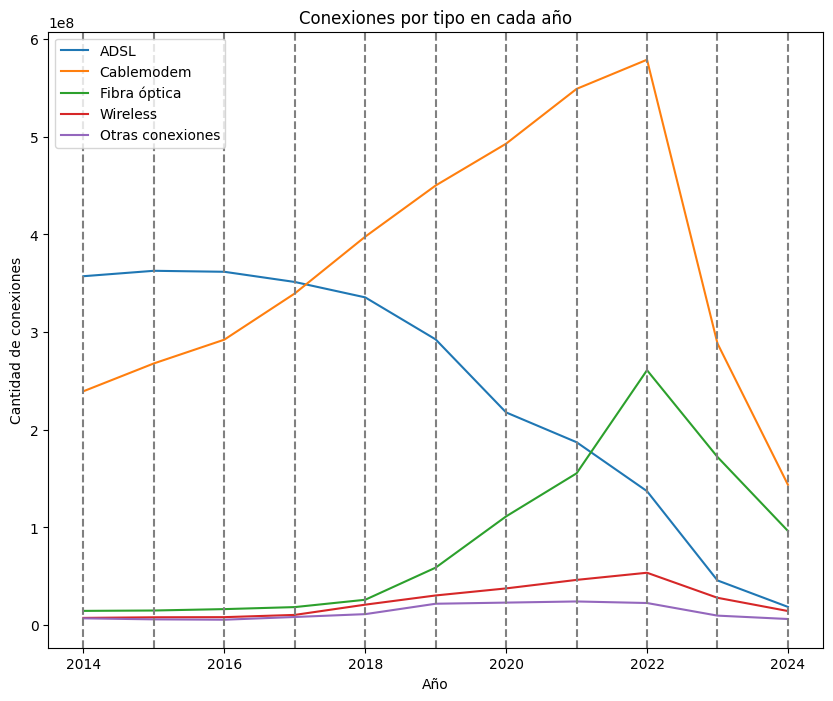

In [26]:
# Comparo conexiones por año
conn_types =  ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras conexiones']
df_conn_types = dfn[conn_types].groupby(dfn['Año']).sum()

plt.figure(figsize=(10, 8))
for conn_type in conn_types:
    plt.plot(df_conn_types.index, df_conn_types[conn_type], label=conn_type)

plt.title('Conexiones por tipo en cada año')
plt.xlabel('Año')
plt.ylabel('Cantidad de conexiones')
plt.legend(loc='upper left')

# Agregar líneas verticales de las etiquetas del eje x
for year in df_conn_types.index:
    plt.axvline(x=year, color='gray', linestyle='--')

plt.show()

-------------------------------------------


In [27]:
dfp = pd.read_csv(r"df_partido.csv")
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54880 entries, 0 to 54879
Columns: 151 entries, Unnamed: 0 to Longitud
dtypes: float64(126), int64(11), object(14)
memory usage: 63.2+ MB


C:\Users\rocio\AppData\Local\Temp\ipykernel_844\3332757804.py:1: DtypeWarning: Columns (4,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfp = pd.read_csv(r"df_partido.csv")


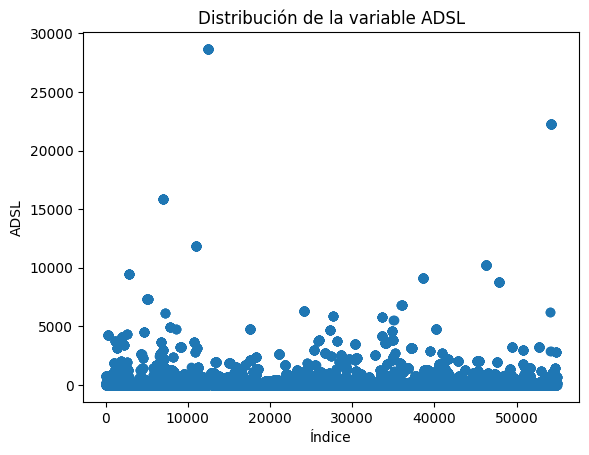

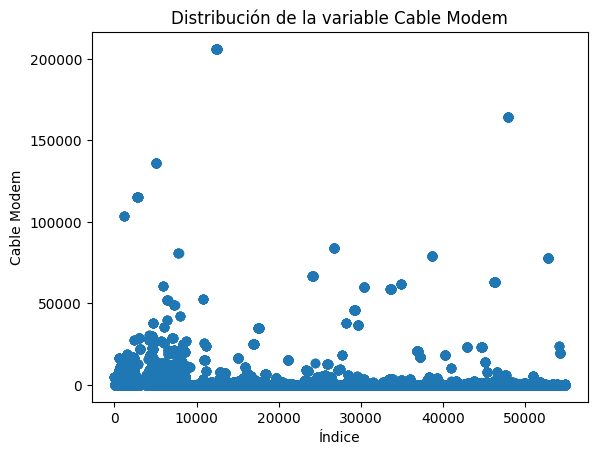

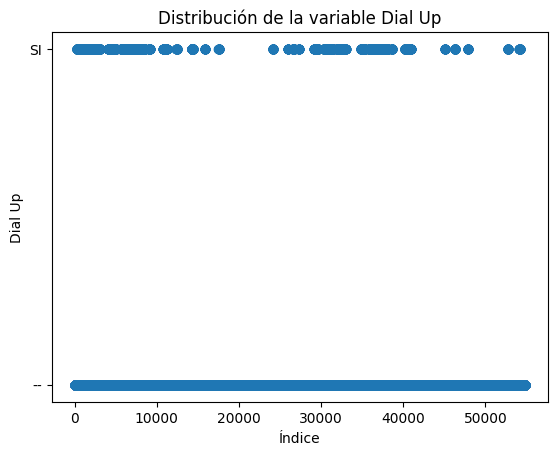

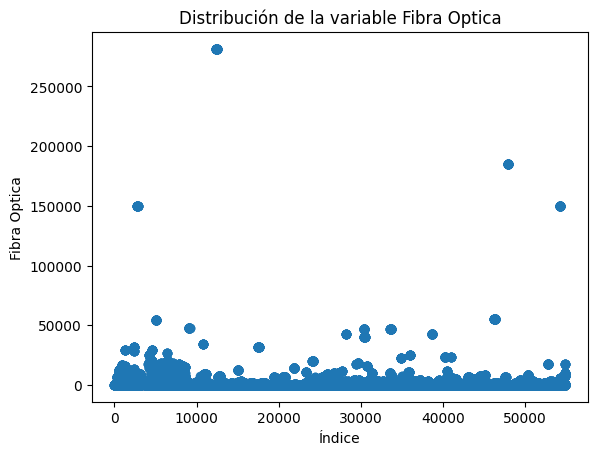

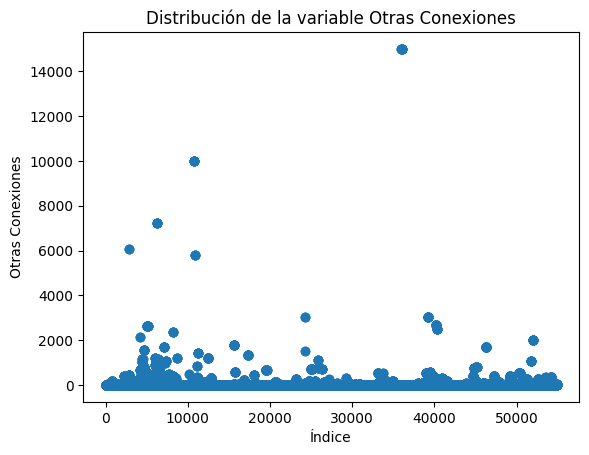

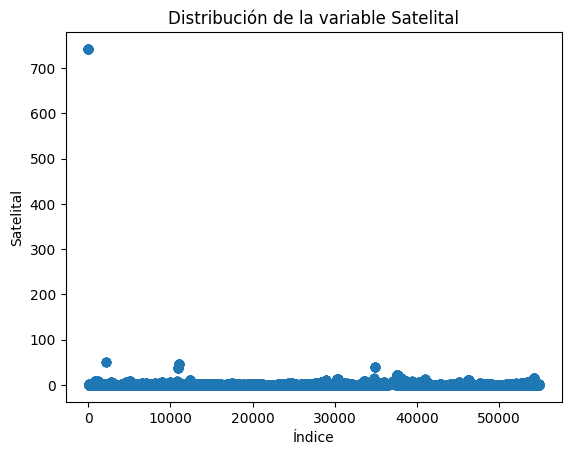

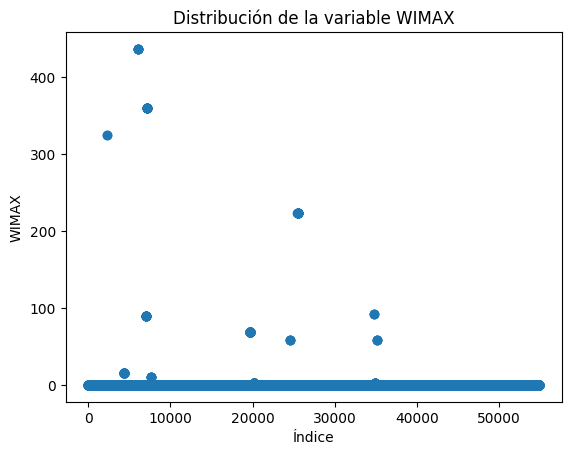

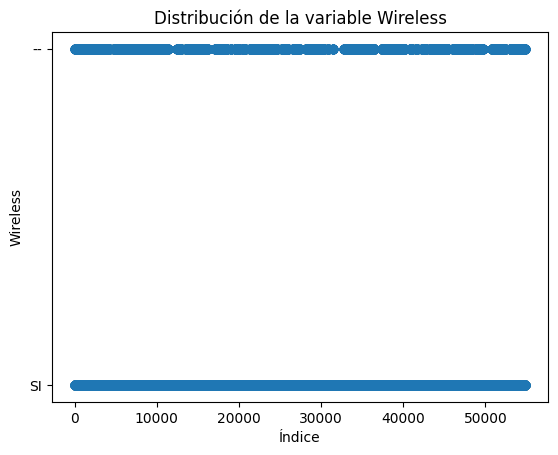

In [28]:
# Lista de columnas para analizar
columnas = ['ADSL', 'Cable Modem', 'Dial Up', 'Fibra Optica', 'Otras Conexiones', 'Satelital', 'WIMAX', 'Wireless']

# Iterar sobre las columnas y generar gráficos de dispersión
for columna in columnas:
    plt.scatter(range(len(dfp)), dfp[columna])
    plt.xlabel('Índice')
    plt.ylabel(columna)
    plt.title(f'Distribución de la variable {columna}')
    plt.show()

------------


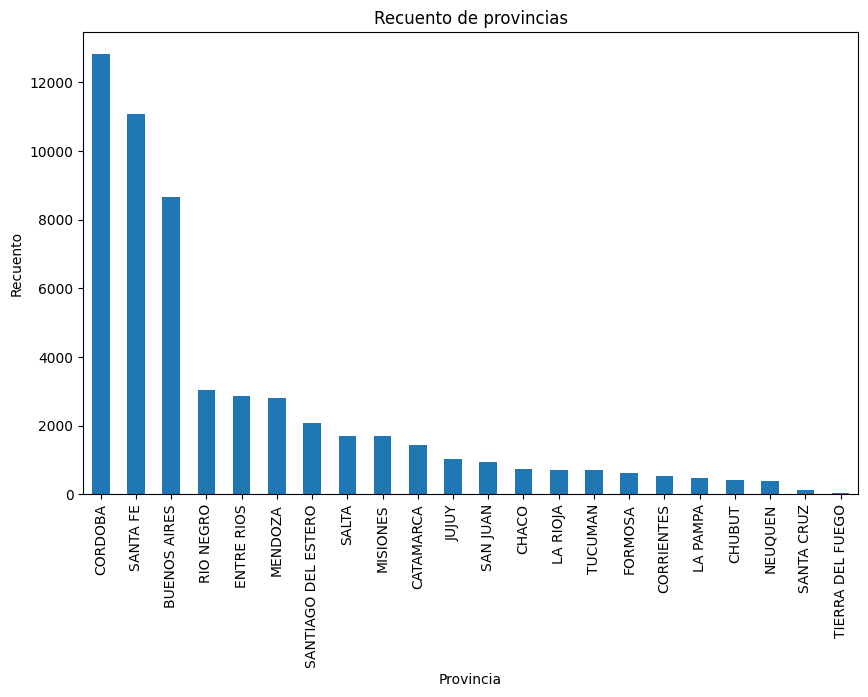

In [29]:
# Recuento de provincias
cuenta_provincia = dfp['Provincia'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
cuenta_provincia.plot(kind='bar')
plt.xlabel('Provincia')
plt.ylabel('Recuento')
plt.title('Recuento de provincias')
plt.show()

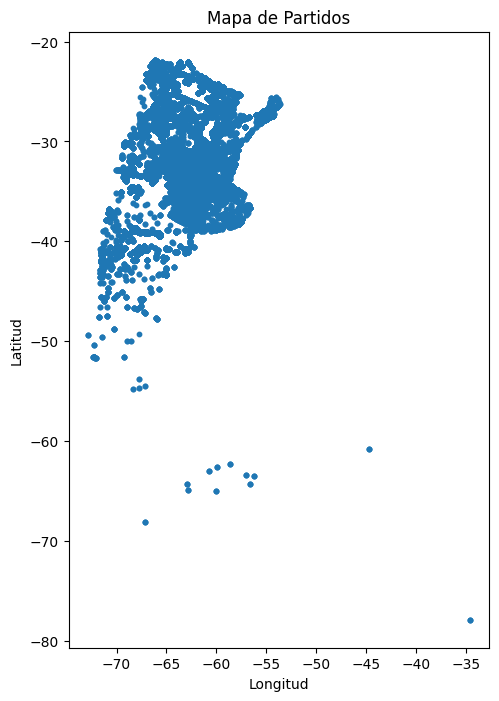

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt

dfp['Latitud'] = dfp['Latitud'].apply(lambda x: str(x).replace('..', '.')).astype(float)
dfp['Longitud'] = dfp['Longitud'].apply(lambda x: str(x).replace('..', '.')).astype(float)

# Crear un objeto GeoDataFrame a partir de las columnas "Latitud" y "Longitud"
geometry = gpd.points_from_xy(dfp['Longitud'], dfp['Latitud'])
gdf = gpd.GeoDataFrame(dfp, geometry=geometry)

# Crear el mapa
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, markersize=10)

# Añadir título y etiquetas
ax.set_title('Mapa de Partidos')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa
plt.show()

Algunas coordenadas del datset se encuentran registradas con error por lo que los puntos correspondientes a esas localidades, escapan del mapa.

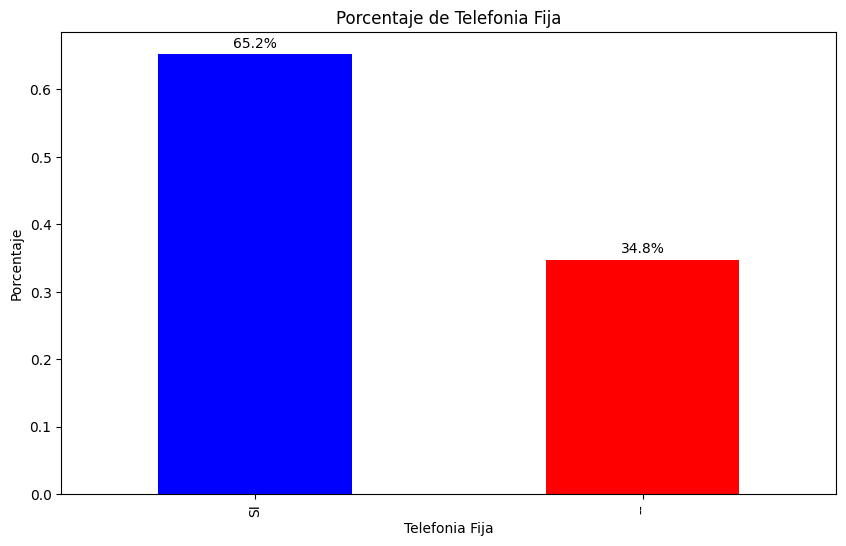

In [31]:
colores = ['blue', 'red']
plt.figure(figsize=(10, 6))
counts = dfp['Telefonia Fija'].value_counts(normalize=True)
ax = counts.plot(kind='bar', color=colores)

# Mostrar porcentajes en las etiquetas de las barras
for i, count in enumerate(counts):
    ax.text(i, count + 0.01, f'{count*100:.1f}%', ha='center')

plt.xlabel('Telefonia Fija')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Telefonia Fija')
plt.show()

---

In [32]:
dfn = pd.read_csv('df_nac.csv')
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22464 entries, 0 to 22463
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 22464 non-null  int64  
 1   Año                        22464 non-null  int64  
 2   Trimestre                  22464 non-null  int64  
 3   Banda ancha fija           22464 non-null  int64  
 4   Dial up                    22464 non-null  int64  
 5   Mbps (Media de bajada)     22464 non-null  float64
 6   Trimestre.1                22464 non-null  object 
 7   Provincia_x                22464 non-null  object 
 8   Hasta 512 kbps             22464 non-null  float64
 9   Entre 512 Kbps y 1 Mbps    22464 non-null  float64
 10  Entre 1 Mbps y 6 Mbps      22464 non-null  float64
 11  Entre 6 Mbps y 10 Mbps     22464 non-null  float64
 12  Entre 10 Mbps y 20 Mbps    22464 non-null  float64
 13  Entre 20 Mbps y 30 Mbps    22464 non-null  flo

In [33]:
columns_of_interest = [
    'Hasta 512 kbps', 
    'Entre 512 Kbps y 1 Mbps', 
    'Entre 1 Mbps y 6 Mbps', 
    'Entre 6 Mbps y 10 Mbps', 
    'Entre 10 Mbps y 20 Mbps', 
    'Entre 20 Mbps y 30 Mbps', 
    'Mas de 30 Mbps'
]

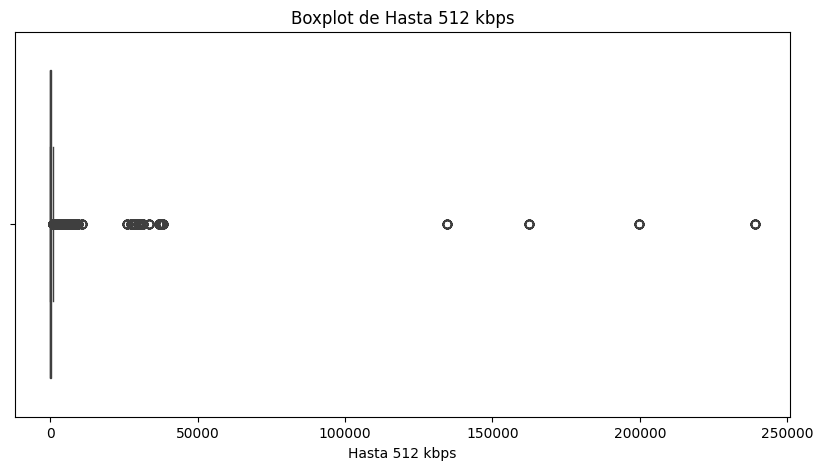

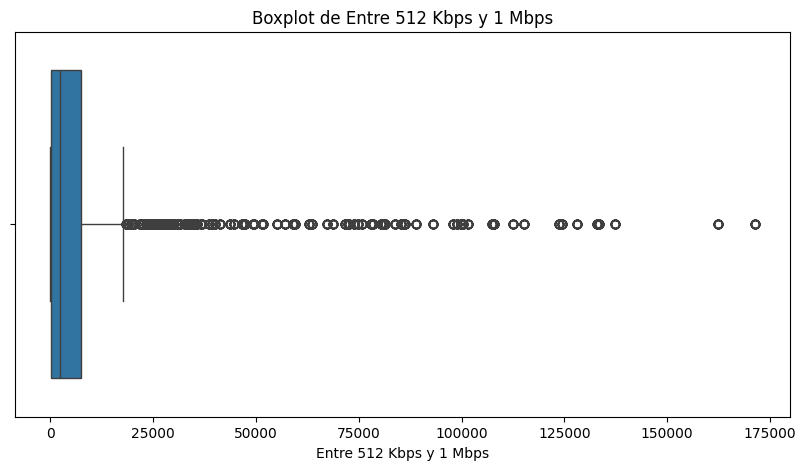

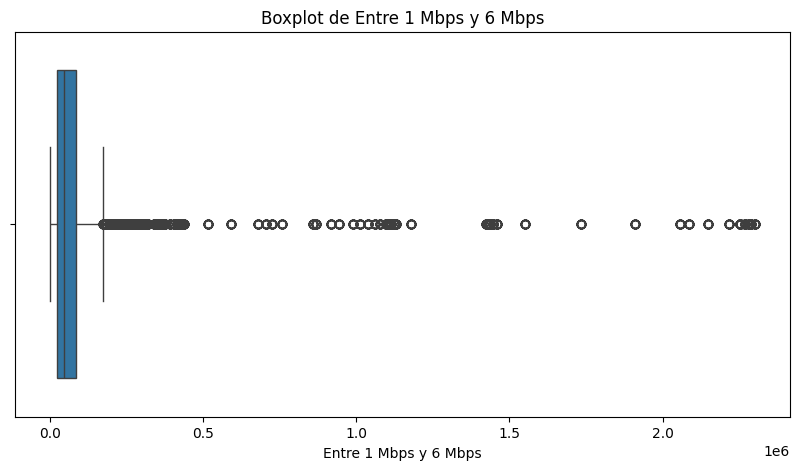

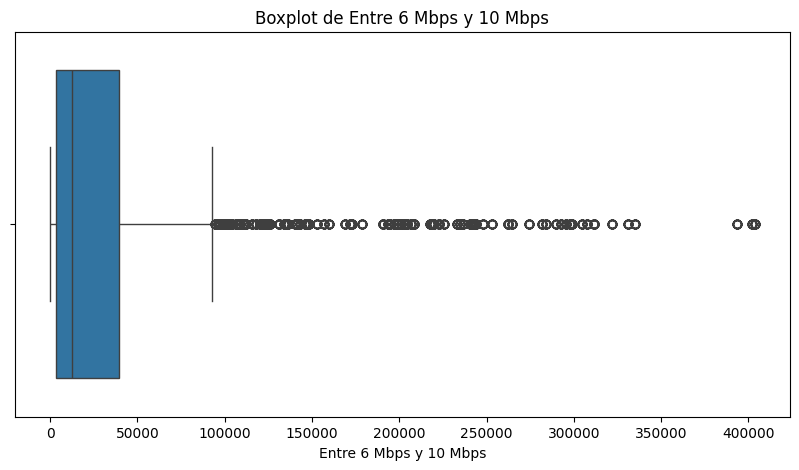

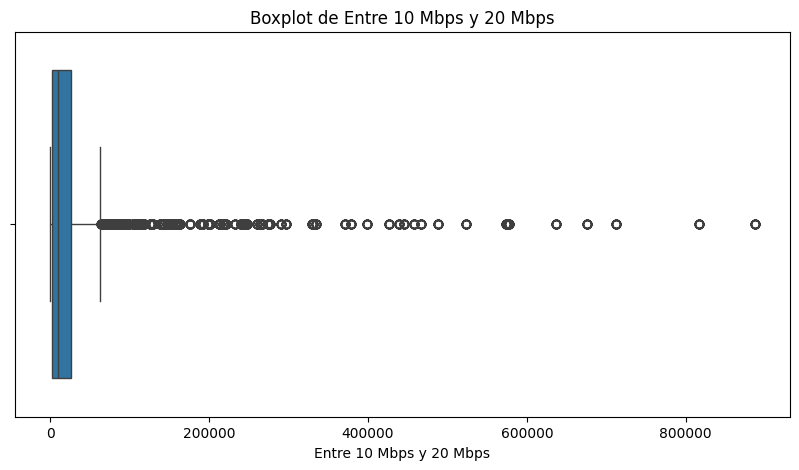

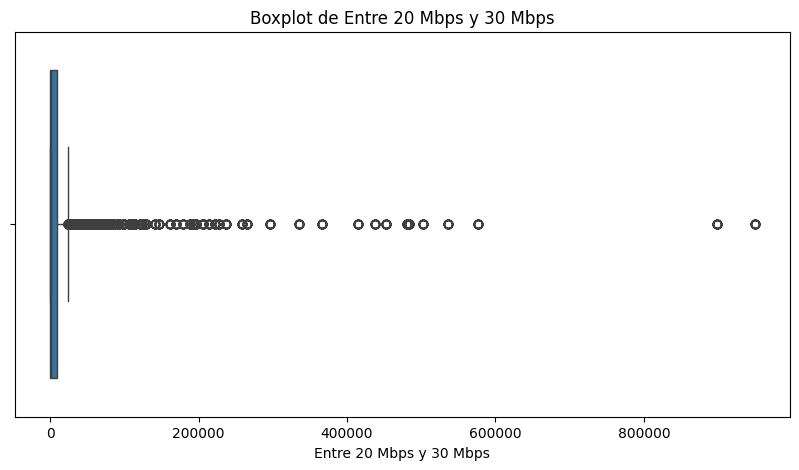

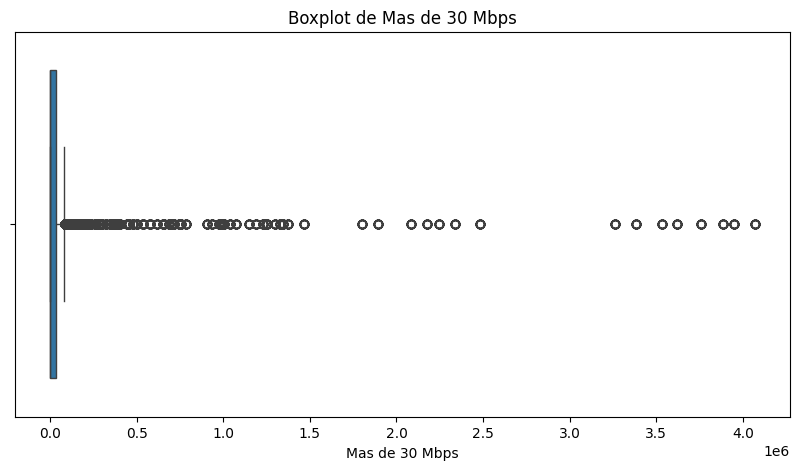

In [34]:
for column in columns_of_interest:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=dfn[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

Al visualizar los outliers decido ir mas profundamente para evaluar la cantidad de los mismos por cada grafico.

In [35]:
# Definir un diccionario para almacenar los outliers
outliers_dict = {}

for column in columns_of_interest:
    Q1 = dfn[column].quantile(0.25)
    Q3 = dfn[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir los límites de los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar los outliers
    outliers = dfn[(dfn[column] < lower_bound) | (dfn[column] > upper_bound)]
    
    # Almacenar los resultados en el diccionario
    outliers_dict[column] = outliers

# Revisar el número de outliers en cada columna
for column, outliers in outliers_dict.items():
    print(f"Columna: {column}, Outliers encontrados: {len(outliers)}")


Columna: Hasta 512 kbps, Outliers encontrados: 3744
Columna: Entre 512 Kbps y 1 Mbps, Outliers encontrados: 2688
Columna: Entre 1 Mbps y 6 Mbps, Outliers encontrados: 3312
Columna: Entre 6 Mbps y 10 Mbps, Outliers encontrados: 2688
Columna: Entre 10 Mbps y 20 Mbps, Outliers encontrados: 2928
Columna: Entre 20 Mbps y 30 Mbps, Outliers encontrados: 2928
Columna: Mas de 30 Mbps, Outliers encontrados: 3120


Se realizo un boxplot para cada una de las columnas de interes con el fin de visualizar outliers ya que estas columnas especificamente representan diferentes rangos de velocidad de conexión. Un outlier aquí podría indicar una concentración inusualmente alta de conexiones en un rango específico, lo que podría no ser esperado y podría señalar anomalías en la distribución de velocidades en diferentes provincias.

In [36]:
outliers_df = pd.DataFrame()
for column in columns_of_interest:
    Q1 = dfn[column].quantile(0.25)
    Q3 = dfn[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_df[column] = dfn[(dfn[column] < lower_bound) | (dfn[column] > upper_bound)][column]


In [37]:
outliers_df.to_csv('outliers_detectados.csv', index=False)

---

In [38]:
outliers = pd.read_csv('./outliers_detectados.csv')
outliers.sample(15)

,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Mas de 30 Mbps
1366,3958.0,49501.00,360606.0,NaN,69864.0,NaN,NaN
2445,3413.0,NaN,NaN,NaN,NaN,NaN,NaN
3074,1709.0,29710.00,NaN,NaN,NaN,NaN,NaN
3234,6902.0,162273.72,2288771.6,140226.12,NaN,NaN,NaN
176,37821.0,NaN,352950.0,331292.00,297296.0,196021.0,3259793.0
2231,1126.0,NaN,NaN,NaN,NaN,NaN,NaN
19,26002.0,22510.00,221185.0,233225.00,241778.0,106418.0,4068292.0
909,7548.0,47472.00,1910156.0,299009.00,573298.0,93059.0,NaN
1082,1547.0,NaN,NaN,NaN,NaN,NaN,NaN
2604,2458.0,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
outliers.dtypes

Hasta 512 kbps             float64
Entre 512 Kbps y 1 Mbps    float64
Entre 1 Mbps y 6 Mbps      float64
Entre 6 Mbps y 10 Mbps     float64
Entre 10 Mbps y 20 Mbps    float64
Entre 20 Mbps y 30 Mbps    float64
Mas de 30 Mbps             float64
dtype: object

Se decide no eliminar las columnas ni las filas, ya que se estaria perjudicando el resto de los datos.

---------